# 변수 변환 실습

## 1. 필요 라이브러리 import

In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus": False})

## 2. 데이터셋 준비
- 타이타닉 데이터넷

### 1) 데이터 Read를 위한 경로 확인

In [3]:
# 현재 경로 확인
os.getcwd()

'C:\\Users\\user\\Documents\\데이터분석 청년인재 양성사업\\Data processing(데이터 전처리)'

In [4]:
# 폴더 및 파일 리스트 확인
os.listdir()

['.ipynb_checkpoints',
 'titanic',
 'Y220585조성주_서울_1_3반.zip',
 '실습1_데이터 실수화.ipynb',
 '실습2_결측값 처리.ipynb',
 '실습3_이상값 처리.ipynb',
 '실습4_변수 선택.ipynb',
 '실습5_파생변수 생성.ipynb',
 '실습6_변수 변환.ipynb']

In [5]:
# 경로 설정
os.chdir('titanic')

In [6]:
# 폴더 및 파일 리스트 확인
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

### 2) 데이터셋 준비

In [7]:
# 데이터 리드
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# 리스트 형태 데이터 병합
train_test_data = [train, test]

In [8]:
type(train_test_data)

list

In [9]:
type(train)

pandas.core.frame.DataFrame

## 3. 변수 변환: log 변환

In [10]:
# 데이터 카피
data = train.copy()

In [11]:
# 데이터셋 shape 확인
print(data.shape)

# 범주형 변수 기술 통계 정보 확인
data.describe(include = object)

(891, 12)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
# 수치형 변수 기술 통계 정보 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
# 연속형 변수 속성 추출
numerical_feats = data.dtypes[data.dtypes == 'int64'].index
numerical_feats = numerical_feats.append(data.dtypes[data.dtypes == 'float64'].index)
print('연속형 변수 카운트: ', len(numerical_feats))

연속형 변수 카운트:  7


In [15]:
numerical_feats

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare'], dtype='object')

In [16]:
# 연속형 변수의 왜도와 첨도 확인
for col in numerical_feats:
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(data[col].skew()),
         '   ',
         'Kurotosis: {:06.2f}'.format(data[col].kurt()))

PassengerId     Skewness: 00.00     Kurotosis: -01.20
Survived        Skewness: 00.48     Kurotosis: -01.78
Pclass          Skewness: -0.63     Kurotosis: -01.28
SibSp           Skewness: 03.70     Kurotosis: 017.88
Parch           Skewness: 02.75     Kurotosis: 009.78
Age             Skewness: 00.39     Kurotosis: 000.18
Fare            Skewness: 04.79     Kurotosis: 033.40


<AxesSubplot:xlabel='Fare', ylabel='Density'>

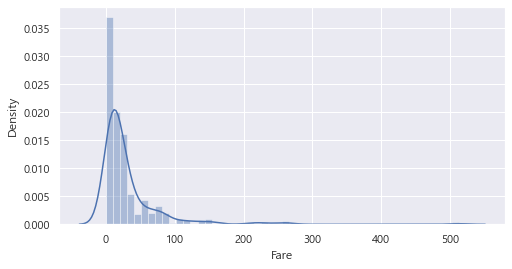

In [17]:
# 왜도가 큰 'Fare' 변수의 분포 확인
f, ax = plt.subplots(figsize = (8, 4))
sns.distplot(data['Fare'])

Skewness: 0.395
Kurtosis: 0.976


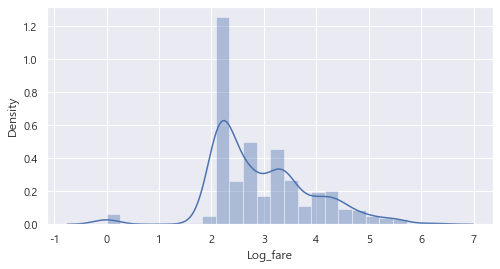

In [18]:
# 로그 변환 수행
data['Log_fare'] = np.log1p(data['Fare'])

f, ax = plt.subplots(figsize = (8, 4))
sns.distplot(data['Log_fare'])

print('Skewness: {:.3f}'.format(data['Log_fare'].skew()))
print('Kurtosis: {:.3f}'.format(data['Log_fare'].kurt()))

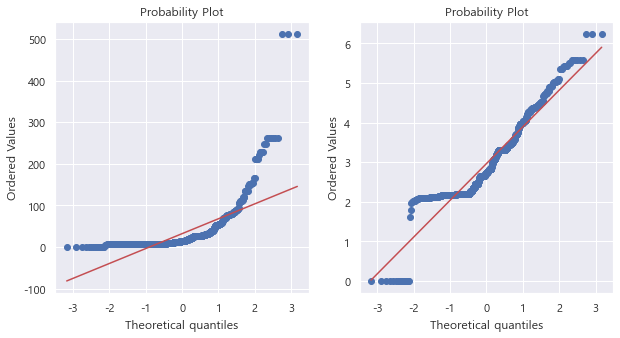

In [19]:
# QQ-Plot으로 정규성 검정
fig = plt.figure(figsize = (10, 5))

fig.add_subplot(1, 2, 1)
res = stats.probplot(data['Fare'], plot = plt)

fig.add_subplot(1, 2, 2)
res = stats.probplot(data['Log_fare'], plot = plt)

# 로그 변환 후 우측 그림처럼 빨간선에 가깝게 데이터 분포가 구성된 것 확인

## 4. 변수 변환: Min-Max 정규화

In [20]:
# 데이터 확인
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Mr, Miss 값이 저장된 파생변수 생성
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([\w] +)\.', expand = False)
    
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].apply(lambda x: 0 if x == 'Mr' else 1 if x == 'Miss' else 2
                                             if x == 'Mrs' else 3 if x == 'Master' else 4)
    
# 결측값 제거
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('median'), inplace = True)

In [22]:
# Min-Max 정규화
scaler = MinMaxScaler()

for dataset in train_test_data:
    array = dataset['Age'].values.reshape(-1, 1)
    scaler.fit(array)
    dataset['AgeScale'] = pd.Series(scaler.transform(array).reshape(-1))
    
# AgeScale 변수 확인
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,0.434531


In [23]:
# Min-Max 정규화 전 Age 변수의 min, max 값
print(train['Age'].min())
print(train['Age'].max())
print('    ')

# Min-Max 정규화 후 Agescale 변수의 min, max 값
print(train['AgeScale'].min())
print(train['AgeScale'].max())

0.42
80.0
    
0.0
1.0


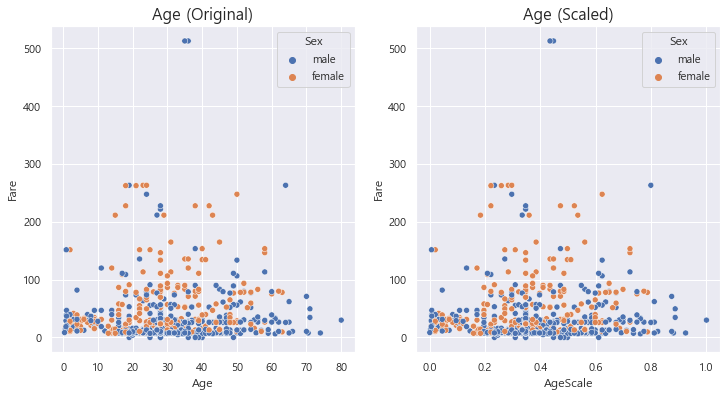

In [24]:
# Min-Max 정규화 전, 후 Age 속성과 AgeScale 속성의 산점도 비교
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
scatter_plot = sns.scatterplot(x='Age', y='Fare', hue='Sex', data=train)
plt.title('Age (Original)', fontsize=16)

plt.subplot(1, 2, 2)
scatter_plot = sns.scatterplot(x='AgeScale', y='Fare', hue='Sex', data=train)
plt.title('Age (Scaled)', fontsize=16)
plt.show()

## 5. 표준화

In [25]:
# 데이터 확인
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,0.434531


In [35]:
# 결측값 중앙값으로 대체
for dataset in train_test_data:
    dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'), inplace = True)
    
# 표준화 수행
scaler = StandardScaler()

for dataset in train_test_data:
    array = dataset['Fare'].values.reshape(-1, 1)
    scaler.fit(array)
    dataset['FareScale'] = pd.Series(scaler.transform(array).reshape(-1))

train_test_data[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeScale,FareScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4,0.434531,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,4,0.334004,-0.386671
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,4,0.233476,-0.044381
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4,0.346569,-0.176263
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,4,0.321438,-0.044381


In [27]:
# 표준화 전 Fare 변수의 mean, var 값
print(train['Fare'].mean())
print(train['Fare'].var())
print('    ')

# 표준화 후 Fare 변수의 mean, var 값
print(train['FareScale'].mean())
print(train['FareScale'].var())

32.2042079685746
2469.436845743117
    
-4.37360585458395e-17
1.0011235955056188


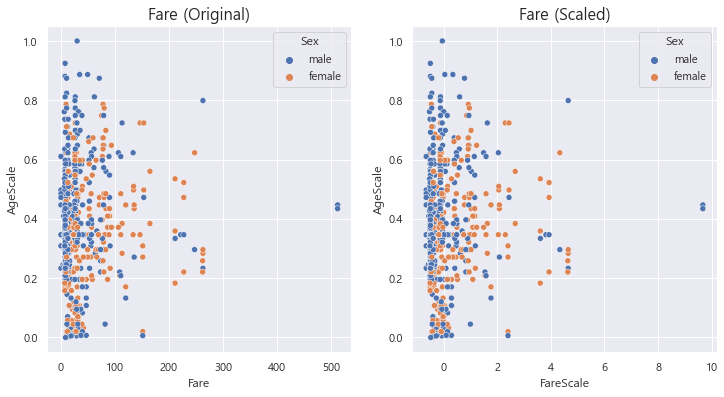

In [32]:
# 표준화 전, 후 Fare 변수와 FareScale 변수의 산점도 비교
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter_plot = sns.scatterplot(x = 'Fare', y='AgeScale', hue='Sex', data=train)
plt.title('Fare (Original)', fontsize=16)

plt.subplot(1, 2, 2)
scatter_plot = sns.scatterplot(x='FareScale', y='AgeScale', hue='Sex', data=train)
plt.title('Fare (Scaled)', fontsize=16)
plt.show()

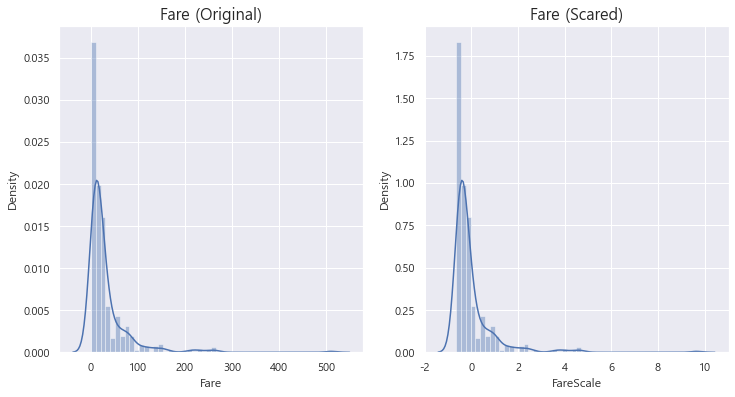

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dis_plot = sns.distplot(train['Fare'], label = 'Fare')
plt.title('Fare (Original)', fontsize=16)

plt.subplot(1, 2, 2)
dis_plot = sns.distplot(train['FareScale'], label = 'FareScale')
plt.title('Fare (Scared)', fontsize=16)
plt.show()